In [1]:
import zipfile

import numpy as np
import pandas as pd
import os
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from pathlib import Path
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
for path in glob.glob('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/*.jpg'):
    if not(os.path.exists('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/cat') or os.path.exists('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/dog')):
        os.makedirs('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/cat')
        os.makedirs('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/dog')
        print('Done!')
    
    if 'cat' in path:
        shutil.move(path, 'Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/cat/' + path.split('/')[-1])
    else:
        shutil.move(path, 'Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/dog/' + path.split('/')[-1])

In [3]:
my_dataset = {}
for class_name in glob.glob('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/*'):
    my_dataset[class_name.split('/')[-1]] = glob.glob(class_name + '/*')

In [4]:
print(f"These are the keys in my dataset {my_dataset.keys()}")

These are the keys in my dataset dict_keys([])


In [5]:
x = my_dataset.keys()
y = [len(keys) for keys in my_dataset.values()]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"The shape of my data before splitting is {y}")

The shape of my data before splitting is []


In [7]:
def img_props(file):
    image = cv2.imread(file)
    h, w, d = image.shape
    return h, w, d

In [8]:
df = pd.DataFrame(columns=['Height',
                           'Width',
                           'Channels',
                           'Class'])

for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        h,w,d = img_props(path)
        df.loc[len(df)] = [h,w,d,pet_class]

df.head(11)

,Height,Width,Channels,Class


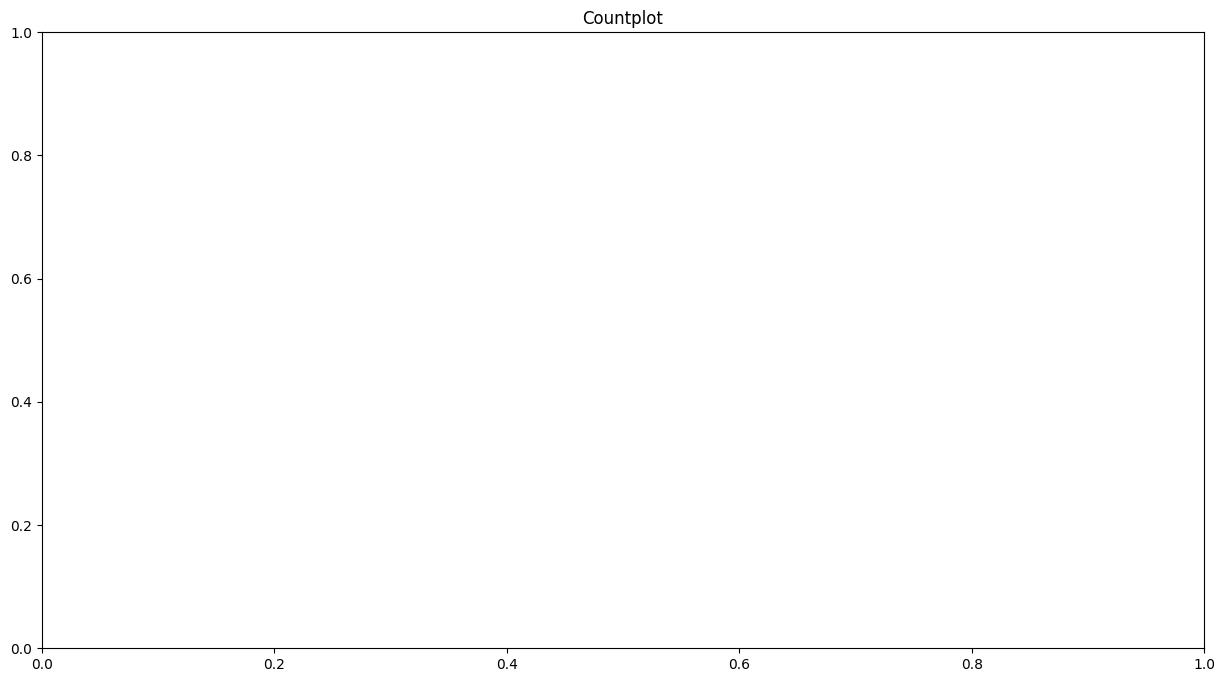

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Class')
plt.title('Countplot')
plt.show()

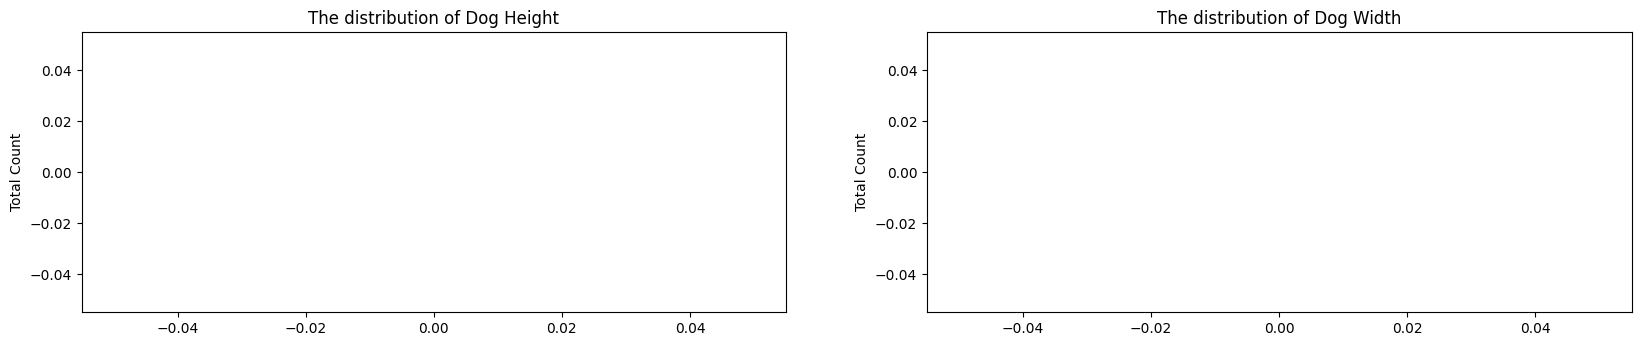

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='train\dog']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='train\dog']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Width')
plt.show()

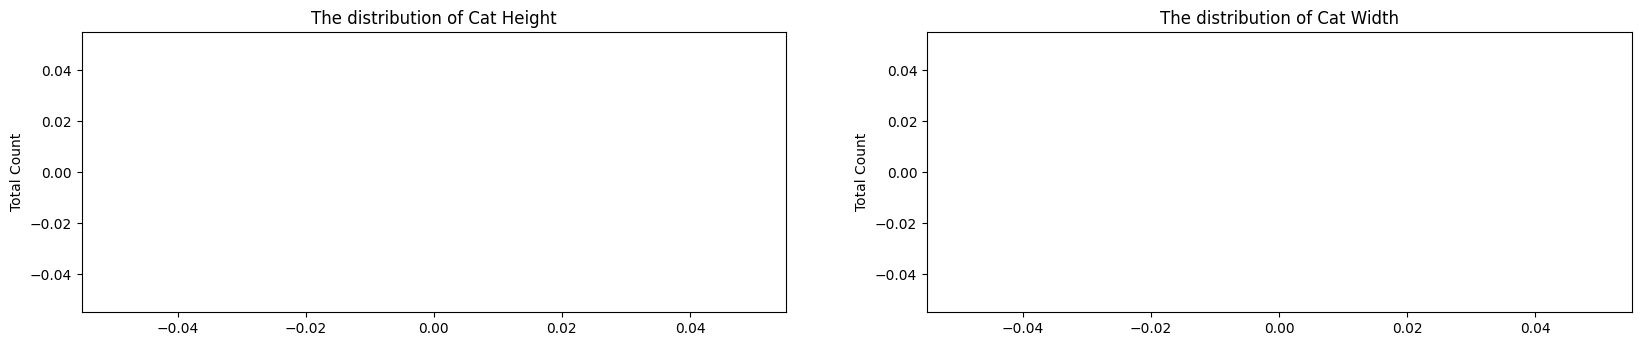

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='train\cat']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='train\cat']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Width')
plt.show()

In [12]:
count = 0
plt.figure(figsize=(15,15))
for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        sp = plt.subplot(2, 4, count + 1, )
        sp.axis('Off')
        sp.set_title(pet_class)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        count +=1 
        if count % 4 == 0:
            break

plt.show()

<Figure size 1500x1500 with 0 Axes>

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['Class'] = lbl_encoder.fit_transform(df['Class'])
df.head()

,Height,Width,Channels,Class


In [14]:
df['Class'].value_counts().head()

Series([], Name: count, dtype: int64)

In [16]:
from sklearn.model_selection import train_test_split
X =  df.drop(['Class'],axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [17]:
X_train.shape, y_train.shape

NameError: name 'X_train' is not defined

In [18]:
X_train = X_train/255
X_test = X_test/255
X_train

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5599760095961616


In [ ]:
print(f"The Classification Report for SVC model is \n{classification_report(y_test, y_pred)}")

The Classification Report for SVC model is 
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      2526
           1       0.57      0.47      0.52      2476

    accuracy                           0.56      5002
   macro avg       0.56      0.56      0.56      5002
weighted avg       0.56      0.56      0.56      5002



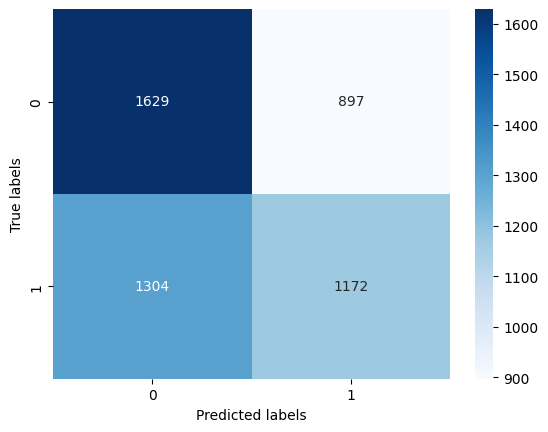

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(f"The Accuracy score for  my SVC model is \n{accuracy_score(y_test, y_pred)*100}%")

The Accuracy score for  my SVC model is 
55.99760095961616%
